## Learning Gabor Filters with ICA

In [1]:
# From http://peekaboo-vision.blogspot.com/2012/04/learning-gabor-filters-with-ica-and.html

In [2]:
# and from https://gist.github.com/amueller/2420407

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import FastICA, PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [4]:
# fetch natural image patches
image_patches = fetch_mldata("natural scenes data")
X = image_patches.data

In [5]:
# 1000 patches a 32x32
# not so much data, reshape to 16000 patches a 8x8
X = X.reshape(1000, 4, 8, 4, 8)
X = np.rollaxis(X, 3, 2).reshape(-1, 8 * 8)

In [6]:
# perform ICA
ica = FastICA(n_components=49)
ica.fit(X)
#filters_ica = ica.unmixing_matrix_

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=49, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [7]:
filters_ica = ica.components_

In [8]:
# zero mean "by hand" so that inverse transform
# doesn't mess up the filters
X -= X.mean(axis=0)
# perform whitening
pca = PCA(n_components=49, whiten=True)
X_white = pca.fit_transform(X)
kmeans = KMeans(n_clusters=49, n_init=1).fit(X_white)

In [9]:
filters_kmeans = pca.inverse_transform(kmeans.cluster_centers_)
filters_pca = pca.components_

In [10]:
titles = ["ICA", "PCA", "k-means"]
filters = [filters_ica, filters_pca, filters_kmeans]

ICA


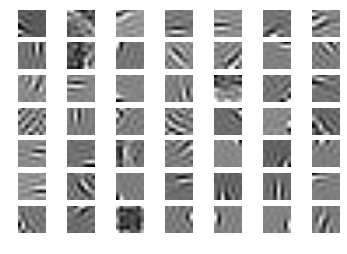

PCA


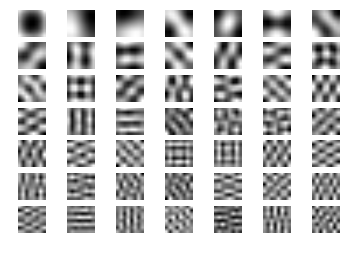

k-means


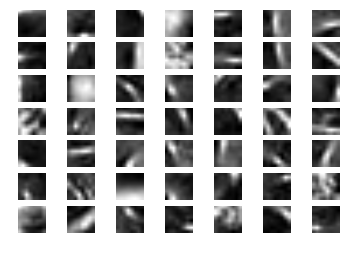

In [11]:
for T, F in zip(titles, filters):
    print(T)
    plt.figure(T)
    for i, f in enumerate(F):
        plt.subplot(7, 7, i + 1)
        plt.imshow(f.reshape(8, 8), cmap="gray")
        plt.axis("off")
    plt.show()